# NIMH Project - Machine Learning - Testing

In [25]:
import os

import re
import nltk
import numpy as np
import pandas as pd
import pickle as pkl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from nltk.stem.wordnet import WordNetLemmatizer

import math
import chardet
os.chdir('C:/Users/hpan/Documents/python')

In [ ]:
# Skip following goto start, load pickle file

In [6]:
#%%

data = pd.read_csv("./results/tt_4801395.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,pat_visit,r_score,sum1,fsize,note_txt,labelm,labeln
0,0,9,19251156_2244945,7,1,13,MRN: 19251156\r\r\n...... ...,0,0
1,1,270,5648753_185153195,11,13,23,MRN: 5648753\r\r\n...... MRN: 5648753\r\r\n......,1,1
2,2,257,6461602_183586354,12,12,24,MRN: 6461602\r\r\n...... MRN: ...,1,1
3,3,412,8538647_2092146,13,18,16,MRN: 8538647\r\r\n...... MRN: ...,1,1
4,4,434,6285951_2295095,13,20,43,MRN: 6285951\r\r\n...... MRN: ...,1,1


In [7]:
#%%
corpusList=data[data.columns[6]].tolist()
labelm=data[data.columns[7]].tolist()
labeln=data[data.columns[8]].tolist()

In [8]:
len(corpusList)

1875

In [13]:
"""#%%
#test
os.chdir('C:/Users/hpan/Documents/python')
test = pd.read_csv("./results/test_800595.csv")

#%%
corpusList_test=test[train.columns[5]].tolist()
labels_testm=test[train.columns[6]].tolist()
labels_testn=test[train.columns[7]].tolist()"""

In [16]:
#%%
def tokenize(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = [ token for token in tokens if re.search('(^[a-zA-Z]+$)', token) ]
    a=[]
    for i in filtered_tokens:
        a.append(WordNetLemmatizer().lemmatize(i,'v'))
    return a
    #return filtered_tokens


cachedStopWords = stopwords.words("english")

In [17]:
#%%
cv = TfidfVectorizer(lowercase=True,
                     ngram_range=(1, 4), preprocessor=None, stop_words='english',
                     strip_accents=None, tokenizer=tokenize, vocabulary=None)
X1 = cv.fit_transform(corpusList)
lexicon = cv.get_feature_names()
#print (lexicon)
print()

#%%
x=X1  ## for select fetures 
print(x.shape)

pkl.dump( x, open( "./results/tfidf_4801395.pickle", "wb" ) )
pkl.dump( lexicon, open( "./results/lexicon_4801395.pickle", "wb" ) )
#x1 = pkl.load( open( "./results/tfidf_4801395.pickle", "rb" ) )
#lexicon1 = pkl.load( open( "./results/lexicon_4801395.pickle", "rb" ) )


(1875, 2054755)


In [18]:
type(x)

scipy.sparse.csr.csr_matrix

In [9]:
Ym = np.array(labelm)
Yn = np.array(labeln)
pkl.dump( Ym, open( "./results/ym_4801395.pickle", "wb" ) )
pkl.dump( Yn, open( "./results/yn_4801395.pickle", "wb" ) )
#print(Y)  ## class level

In [ ]:
"""#%%
#test
cvt = TfidfVectorizer(lowercase=True,
                     ngram_range=(1, 3), preprocessor=None, stop_words='english',
                     strip_accents=None, tokenizer=tokenize, vocabulary=None)

X1t = cvt.fit_transform(corpusList_test)
print(X1t.shape)
print()
lexicon_test = cvt.get_feature_names()
#print (lexicon)
print()

#%%
xt=X1t  ## for select fetures 
print(xt.shape)

Ym = np.array(labels_testm)
Yn = np.array(labels_testn)"""

In [20]:
print(Ym[0:10], Ym[480:490], Ym[1865:])  ## class level
print(Yn[0:10], Yn[480:490], Yn[1865:])  ## class level

[0 1 1 1 1 1 1 0 1 1] [1 1 1 0 0 0 0 0 0 0] [1 0 1 0 0 1 0 0 0 1]
[0 1 1 1 1 1 1 0 1 1] [1 0 0 0 1 1 0 0 1 1] [0 0 0 0 0 0 0 0 1 1]


In [21]:
#%%
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#print(x.shape)

In [23]:
X_new = SelectKBest(chi2, k=800).fit_transform(x, Yn)   # select 800 features

#%%
X=X_new        # make unque name for next cell 
print(X.shape)
#Y

(1875, 800)


In [24]:
pkl.dump( X, open( "./results/tfidf_4801395_chi2_800.pickle", "wb" ) )

# Start here

In [26]:
X_new = pkl.load( open( "./results/tfidf_4801395_chi2_800.pickle", "rb" ) )
Ym = pkl.load( open( "./results/ym_4801395.pickle", "rb" ) )
Yn = pkl.load( open( "./results/yn_4801395.pickle", "rb" ) )
nlp_acc = sum(Ym==Yn)/len(Ym)
print(nlp_acc)
nlp_acc

0.5328


0.5328

In [21]:
type(X_new), type(Yn), len(Ym)

(scipy.sparse.csr.csr_matrix, numpy.ndarray, 1875)

In [27]:
X = X_new[:960]
X2 = X_new[960:]
Yn1 = Yn[:960]
Yn2 = Yn[960:]
Y = Ym[:960]
Y2 = Ym[960:]

In [37]:
""""X2_new = SelectKBest(chi2, k=600).fit_transform(xt, Ym)   # select 600 features
X2_new.shape

#%%
X2=X2_new        # make unque name for next cell 
X2_new.shape""""

(1395, 600)

In [17]:
#%%
# ExtraTreesClassifier
model=0
results = []
cont = []
kf = KFold(n_splits=10, shuffle=True)
trees = [10, 30, 60, 100, 300, 500]
for t in range(len(trees)):
    fold = 1
    truth = []
    rf_prediction = []
    print("model ", t, ": ExtraTreesClassifier = " + str(trees[t]))
    test_count = 0
    rf = ExtraTreesClassifier(bootstrap=False,
           criterion='entropy', max_depth=15, max_features=0.9,
           max_leaf_nodes=None, min_impurity_decrease=1e-045,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=trees[t], n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
    for train_idx, test_idx in kf.split(X):
        trainX = X[train_idx]
        trainY = Y[train_idx]
        testX = X[test_idx]
        testY = Y[test_idx]
        truth.append(testY)
        rf.fit(trainX, trainY)
        Y_hat = rf.predict(testX)
        rf_prediction.append(Y_hat)
        print("   Fold %d accuracy: %.2f %%" % (fold, ((np.sum(Y_hat == testY)/len(testY)) * 100.0)))                        
        fold += 1
    truth = np.concatenate(truth, axis=0)    
    rf_prediction = np.concatenate(rf_prediction, axis=0)
    test_results = np.sum(rf_prediction == truth)/len(truth)
    print("     Overall test accuracy: %.2f %%" % (test_results * 100))  
    rf = rf.fit(X, Y)
    Y_hat = rf.predict(X)
    train_results = np.sum(Y_hat == Y)/len(Y)
    print("     Overall training accuracy: %.2f %%" % (train_results * 100.0))  
    results.append([train_results, test_results])   
    cont.append([truth, rf_prediction])

model  0 : ExtraTreesClassifier = 10
   Fold 1 accuracy: 61.46 %
   Fold 2 accuracy: 62.50 %
   Fold 3 accuracy: 64.58 %
   Fold 4 accuracy: 77.08 %
   Fold 5 accuracy: 69.79 %
   Fold 6 accuracy: 69.79 %
   Fold 7 accuracy: 63.54 %
   Fold 8 accuracy: 69.79 %
   Fold 9 accuracy: 66.67 %
   Fold 10 accuracy: 68.75 %
     Overall test accuracy: 67.40 %
     Overall training accuracy: 98.33 %
model  1 : ExtraTreesClassifier = 30
   Fold 1 accuracy: 72.92 %
   Fold 2 accuracy: 64.58 %
   Fold 3 accuracy: 71.88 %
   Fold 4 accuracy: 66.67 %
   Fold 5 accuracy: 64.58 %
   Fold 6 accuracy: 65.62 %
   Fold 7 accuracy: 63.54 %
   Fold 8 accuracy: 68.75 %
   Fold 9 accuracy: 73.96 %
   Fold 10 accuracy: 72.92 %
     Overall test accuracy: 68.54 %
     Overall training accuracy: 99.48 %
model  2 : ExtraTreesClassifier = 60
   Fold 1 accuracy: 78.12 %
   Fold 2 accuracy: 61.46 %
   Fold 3 accuracy: 69.79 %
   Fold 4 accuracy: 62.50 %
   Fold 5 accuracy: 70.83 %
   Fold 6 accuracy: 68.75 %
   Fold

In [28]:
rf = ExtraTreesClassifier(bootstrap=False,
       criterion='entropy', max_depth=15, max_features=0.9,
       max_leaf_nodes=None, min_impurity_decrease=1e-045,
       min_samples_leaf=1, min_samples_split=3,
       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,      #trees[t] = 100
       oob_score=False, random_state=None, verbose=0, warm_start=False)

In [35]:
train_num = 5
for i in range(train_num):
    rf.fit(X, Y)
    Y2_hat = rf.predict(X2)
    vn = np.sum(Y2_hat == Yn2)/len(Yn2)
    vm = np.sum(Y2_hat == Y2)/len(Y2)
    print(np.sum(Y2_hat))
    print("vm ", vm)
    print("vn ",vn)
    
precision = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2_hat)
recall = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2)
f1 = 2*precision*recall/(precision+recall)
print("nlp")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision0 = np.sum(Y2_hat + Y2 == 0)/(len(Y2_hat)-np.sum(Y2_hat))
recall0 = np.sum(Y2_hat + Y2 == 0)/(len(Y2)-np.sum(Y2))
f10 = 2*precision*recall/(precision+recall)
print("nlp0")
print("precision: ", precision0)
print("recall: ", recall0)
print("F1: ", f10)

print("ave")
print("precision: ", (precision+precision0)/2)
print("recall: ", (recall+recall0)/2)
print("F1: ", (f1+f10)/2)

385
vm  0.5486338797814208
vn  0.6240437158469946
388
vm  0.5409836065573771
vn  0.6120218579234973
379
vm  0.5442622950819672
vn  0.6415300546448087
381
vm  0.5508196721311476
vn  0.6109289617486339
384
vm  0.5387978142076503
vn  0.6207650273224044
nlp
precision:  0.4557291666666667
recall:  0.45103092783505155
F1:  0.4533678756476684
nlp0
precision:  0.5988700564971752
recall:  0.603415559772296
F1:  0.4533678756476684
ave
precision:  0.527299611581921
recall:  0.5272232438036738
F1:  0.4533678756476684


In [20]:
print(X2.shape)
print(len(Y2_hat))

(915, 800)
915


In [21]:
#%%
model = input("Enter Best Model: ")
best = cont[int(model)]
rf_ct = pd.crosstab(best[1], best[0], margins=True)
rf_ct.columns = ["no", "social", "Total"]
rf_ct.index = ["no", "social", "Total"]
print()
print("ExtraTrees")
print(rf_ct)
print()

Enter Best Model: 3

ExtraTrees
         no  social  Total
no      378     155    533
social  130     297    427
Total   508     452    960



In [22]:
#%%
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,classification_report
y_true =cont[int(model)][0]
y_pred = cont[int(model)][1]
print(confusion_matrix(y_true, y_pred))
print(f1_score(y_true, y_pred) )

[[378 130]
 [155 297]]
0.6757679180887372


In [23]:
print(recall_score(y_true, y_pred),   )
print(precision_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred))

0.6570796460176991
0.6955503512880562
0.703125
             precision    recall  f1-score   support

          0       0.71      0.74      0.73       508
          1       0.70      0.66      0.68       452

avg / total       0.70      0.70      0.70       960



In [24]:
#%%

Sens = rf_ct.iloc[1][1]/rf_ct.iloc[2][1]
Spec = rf_ct.iloc[0][0]/rf_ct.iloc[2][0]
PPV = rf_ct.iloc[1][1]/rf_ct.iloc[1][2]
NPV = rf_ct.iloc[0][0]/rf_ct.iloc[0][2]
ACC = (rf_ct.iloc[0][0] + rf_ct.iloc[1][1]) / rf_ct.iloc[2][2]
print("ExtraTrees: Sensitivity: %.5f Specificity: %.5f PPV: %.5f NPV: %.5f Accuracy: %.5f" % (Sens, Spec, PPV, NPV, ACC))

ExtraTrees: Sensitivity: 0.65708 Specificity: 0.74409 PPV: 0.69555 NPV: 0.70919 Accuracy: 0.70312


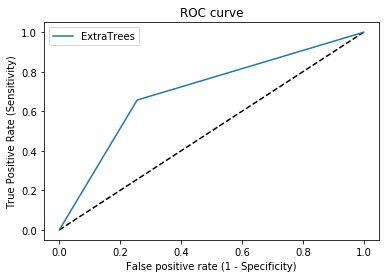

AUC =  0.7005870671033377


In [25]:
#%%
rf_fpr, rf_tpr, rf_thresholds = roc_curve(best[0], best[1], pos_label=1)
roc_auc = auc(rf_fpr, rf_tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rf_fpr, rf_tpr, label='ExtraTrees')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
print("AUC = ", roc_auc)

In [26]:
#%%
# SVM
model = 0
cont = []
results = pd.DataFrame(columns=('name', 'accuracy'))
kf = KFold(n_splits=10, shuffle=True)
C = [1,2,4,6,8,10]
gamma = [1,2]  
for g in range(len(gamma)):
    acc = []
    name = "SVM RBF Gamma=%.3f" % (gamma[g])     
    for c in range(len(C)):
        fold = 1
        truth = []
        svm_prediction = []
        print("model %d: SVM RBF Gamma=%.3f C=%.2f" % (model, gamma[g], C[c]))        
        test_count = 0
        svm = SVC(C=C[c], kernel='rbf', gamma=gamma[g])
        for train_idx, test_idx in kf.split(X):
            trainX = X[train_idx]
            trainY = Y[train_idx]
            testX = X[test_idx]
            testY = Y[test_idx]
            truth.append(testY)
            svm.fit(trainX, trainY)
            Y_hat = svm.predict(testX)
            svm_prediction.append(Y_hat)
            print("   Fold %d accuracy: %.2f %%" % (fold, ((np.sum(Y_hat == testY)/len(testY)) * 100.0)))                        
            fold += 1
        truth = np.concatenate(truth, axis=0)    
        svm_prediction = np.concatenate(svm_prediction, axis=0)
        test_results = np.sum(svm_prediction == truth)/len(truth)
        print("     Overall test accuracy: %.2f %%" % (test_results * 100))  
        svm = svm.fit(X, Y)
        Y_hat = svm.predict(X)
        train_results = np.sum(Y_hat == Y)/len(Y)
        print("     Overall training accuracy: %.2f %%" % (train_results * 100.0))  
        acc.append([train_results, test_results])   
        cont.append([truth, svm_prediction])
        model += 1
    results = results.append({'name': name, 'accuracy' : acc}, ignore_index=True)

model 0: SVM RBF Gamma=1.000 C=1.00
   Fold 1 accuracy: 61.46 %
   Fold 2 accuracy: 69.79 %
   Fold 3 accuracy: 58.33 %
   Fold 4 accuracy: 58.33 %
   Fold 5 accuracy: 65.62 %
   Fold 6 accuracy: 60.42 %
   Fold 7 accuracy: 57.29 %
   Fold 8 accuracy: 60.42 %
   Fold 9 accuracy: 61.46 %
   Fold 10 accuracy: 56.25 %
     Overall test accuracy: 60.94 %
     Overall training accuracy: 63.65 %
model 1: SVM RBF Gamma=1.000 C=2.00
   Fold 1 accuracy: 61.46 %
   Fold 2 accuracy: 60.42 %
   Fold 3 accuracy: 61.46 %
   Fold 4 accuracy: 71.88 %
   Fold 5 accuracy: 62.50 %
   Fold 6 accuracy: 69.79 %
   Fold 7 accuracy: 64.58 %
   Fold 8 accuracy: 60.42 %
   Fold 9 accuracy: 66.67 %
   Fold 10 accuracy: 59.38 %
     Overall test accuracy: 63.85 %
     Overall training accuracy: 66.46 %
model 2: SVM RBF Gamma=1.000 C=4.00
   Fold 1 accuracy: 64.58 %
   Fold 2 accuracy: 76.04 %
   Fold 3 accuracy: 56.25 %
   Fold 4 accuracy: 63.54 %
   Fold 5 accuracy: 65.62 %
   Fold 6 accuracy: 67.71 %
   Fold 7 

In [34]:
#svm = SVC(C=10, kernel='rbf', gamma=2) #vm 52.3% vn 61.0%
#svm = SVC(C=2, kernel='rbf', gamma=128) #vm 56.4% vn 61.3%
svm = SVC(C=10, kernel='rbf', gamma=2) 
train_num = 5
for i in range(train_num):
    svm.fit(X, Y)
    Y2_hat = svm.predict(X2)
    vn = np.sum(Y2_hat == Yn2)/len(Yn2)
    vm = np.sum(Y2_hat == Y2)/len(Y2)
    print(np.sum(Y2_hat))
    print("vm ", vm)
    print("vn ",vn)
    
precision = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2_hat)
recall = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2)
f1 = 2*precision*recall/(precision+recall)
print("nlp")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision0 = np.sum(Y2_hat + Y2 == 0)/(len(Y2_hat)-np.sum(Y2_hat))
recall0 = np.sum(Y2_hat + Y2 == 0)/(len(Y2)-np.sum(Y2))
f10 = 2*precision*recall/(precision+recall)
print("nlp0")
print("precision: ", precision0)
print("recall: ", recall0)
print("F1: ", f10)

print("ave")
print("precision: ", (precision+precision0)/2)
print("recall: ", (recall+recall0)/2)
print("F1: ", (f1+f10)/2)

293
vm  0.5639344262295082
vn  0.6131147540983607
293
vm  0.5639344262295082
vn  0.6131147540983607
293
vm  0.5639344262295082
vn  0.6131147540983607
293
vm  0.5639344262295082
vn  0.6131147540983607
293
vm  0.5639344262295082
vn  0.6131147540983607
nlp
precision:  0.4812286689419795
recall:  0.3634020618556701
F1:  0.41409691629955947
nlp0
precision:  0.6028938906752411
recall:  0.7115749525616698
F1:  0.41409691629955947
ave
precision:  0.5420612798086103
recall:  0.5374885072086699
F1:  0.41409691629955947


In [29]:
#%%

model = input("Enter Best Model: ")
best = cont[int(model)]
rf_ct = pd.crosstab(best[1], best[0], margins=True)
rf_ct.columns = ["no", "social", "Total"]
rf_ct.index = ["no", "social", "Total"]
print()
print("SVM")
print(rf_ct)
print()

Enter Best Model: 11

SVM
         no  social  Total
no      412     191    603
social   96     261    357
Total   508     452    960



In [30]:
#%%

Sens = rf_ct.iloc[1][1]/rf_ct.iloc[2][1]
Spec = rf_ct.iloc[0][0]/rf_ct.iloc[2][0]
PPV = rf_ct.iloc[1][1]/rf_ct.iloc[1][2]
NPV = rf_ct.iloc[0][0]/rf_ct.iloc[0][2]
ACC = (rf_ct.iloc[0][0] + rf_ct.iloc[1][1]) / rf_ct.iloc[2][2]
print("Random Forest: Sensitivity: %.5f Specificity: %.5f PPV: %.5f NPV: %.5f Accuracy: %.5f" % (Sens, Spec, PPV, NPV, ACC))

Random Forest: Sensitivity: 0.57743 Specificity: 0.81102 PPV: 0.73109 NPV: 0.68325 Accuracy: 0.70104


In [31]:
#%%
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,classification_report
y_true =cont[int(model)][0]
y_pred = cont[int(model)][1]
print(confusion_matrix(y_true, y_pred))
print(f1_score(y_true, y_pred) )

print(recall_score(y_true, y_pred),   )
print(precision_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred))

[[412  96]
 [191 261]]
0.6452410383189122
0.577433628318584
0.7310924369747899
0.7010416666666667
             precision    recall  f1-score   support

          0       0.68      0.81      0.74       508
          1       0.73      0.58      0.65       452

avg / total       0.71      0.70      0.70       960



In [32]:
#%%
# RandomForest
model=0
results = []
cont = []
kf = KFold(n_splits=10, shuffle=True)
trees = [5, 10, 50, 100, 200, 300, 400, 500]
for t in range(len(trees)):
    fold = 1
    truth = []
    rf_prediction = []
    print("model ", t, ": Random Forest trees = " + str(trees[t]))
    test_count = 0
    rf = RandomForestClassifier(n_estimators=trees[t], criterion='entropy', n_jobs=-1, )
    for train_idx, test_idx in kf.split(X):
        trainX = X[train_idx]
        trainY = Y[train_idx]
        testX = X[test_idx]
        testY = Y[test_idx]
        truth.append(testY)
        rf.fit(trainX, trainY)
        Y_hat = rf.predict(testX)
        rf_prediction.append(Y_hat)
        print("   Fold %d accuracy: %.2f %%" % (fold, ((np.sum(Y_hat == testY)/len(testY)) * 100.0)))                        
        fold += 1
    truth = np.concatenate(truth, axis=0)    
    rf_prediction = np.concatenate(rf_prediction, axis=0)
    test_results = np.sum(rf_prediction == truth)/len(truth)
    print("     Overall test accuracy: %.2f %%" % (test_results * 100))  
    rf = rf.fit(X, Y)
    Y_hat = rf.predict(X)
    train_results = np.sum(Y_hat == Y)/len(Y)
    print("     Overall training accuracy: %.2f %%" % (train_results * 100.0))  
    results.append([train_results, test_results])   
    cont.append([truth, rf_prediction])

model  0 : Random Forest trees = 5
   Fold 1 accuracy: 59.38 %
   Fold 2 accuracy: 58.33 %
   Fold 3 accuracy: 66.67 %
   Fold 4 accuracy: 62.50 %
   Fold 5 accuracy: 58.33 %
   Fold 6 accuracy: 60.42 %
   Fold 7 accuracy: 64.58 %
   Fold 8 accuracy: 67.71 %
   Fold 9 accuracy: 65.62 %
   Fold 10 accuracy: 56.25 %
     Overall test accuracy: 61.98 %
     Overall training accuracy: 96.25 %
model  1 : Random Forest trees = 10
   Fold 1 accuracy: 69.79 %
   Fold 2 accuracy: 63.54 %
   Fold 3 accuracy: 70.83 %
   Fold 4 accuracy: 61.46 %
   Fold 5 accuracy: 63.54 %
   Fold 6 accuracy: 64.58 %
   Fold 7 accuracy: 67.71 %
   Fold 8 accuracy: 63.54 %
   Fold 9 accuracy: 67.71 %
   Fold 10 accuracy: 67.71 %
     Overall test accuracy: 66.04 %
     Overall training accuracy: 98.85 %
model  2 : Random Forest trees = 50
   Fold 1 accuracy: 66.67 %
   Fold 2 accuracy: 68.75 %
   Fold 3 accuracy: 67.71 %
   Fold 4 accuracy: 67.71 %
   Fold 5 accuracy: 78.12 %
   Fold 6 accuracy: 62.50 %
   Fold 7 a

In [32]:
rf = RandomForestClassifier(n_estimators=400, criterion='entropy', n_jobs=-1, )
train_num = 5
for i in range(train_num):
    rf.fit(X, Y)
    Y2_hat = rf.predict(X2)
    vn = np.sum(Y2_hat == Yn2)/len(Yn2)
    vm = np.sum(Y2_hat == Y2)/len(Y2)
    print(np.sum(Y2_hat))
    print("vm ", vm)
    print("vn ",vn)
    
precision = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2_hat)
recall = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2)
f1 = 2*precision*recall/(precision+recall)
print("nlp")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision0 = np.sum(Y2_hat + Y2 == 0)/(len(Y2_hat)-np.sum(Y2_hat))
recall0 = np.sum(Y2_hat + Y2 == 0)/(len(Y2)-np.sum(Y2))
f10 = 2*precision*recall/(precision+recall)
print("nlp0")
print("precision: ", precision0)
print("recall: ", recall0)
print("F1: ", f10)

print("ave")
print("precision: ", (precision+precision0)/2)
print("recall: ", (recall+recall0)/2)
print("F1: ", (f1+f10)/2)

391
vm  0.5530054644808743
vn  0.6174863387978142
367
vm  0.5508196721311476
vn  0.6218579234972678
375
vm  0.5486338797814208
vn  0.6240437158469946
382
vm  0.5409836065573771
vn  0.614207650273224
386
vm  0.5453551912568306
vn  0.6207650273224044
nlp
precision:  0.4637305699481865
recall:  0.46134020618556704
F1:  0.4625322997416021
nlp0
precision:  0.6049149338374291
recall:  0.6072106261859582
F1:  0.4625322997416021
ave
precision:  0.5343227518928078
recall:  0.5342754161857626
F1:  0.4625322997416021


In [34]:
#%%
model = input("Enter Best Model: ")
best = cont[int(model)]
rf_ct = pd.crosstab(best[1], best[0], margins=True)
rf_ct.columns = ["no", "social", "Total"]
rf_ct.index = ["no", "social", "Total"]
print()
print("Random Forest")
print(rf_ct)
print()

Enter Best Model: 6

Random Forest
         no  social  Total
no      366     154    520
social  142     298    440
Total   508     452    960



In [35]:
#%%

Sens = rf_ct.iloc[1][1]/rf_ct.iloc[2][1]
Spec = rf_ct.iloc[0][0]/rf_ct.iloc[2][0]
PPV = rf_ct.iloc[1][1]/rf_ct.iloc[1][2]
NPV = rf_ct.iloc[0][0]/rf_ct.iloc[0][2]
ACC = (rf_ct.iloc[0][0] + rf_ct.iloc[1][1]) / rf_ct.iloc[2][2]
print("Random Forest: Sensitivity: %.5f Specificity: %.5f PPV: %.5f NPV: %.5f Accuracy: %.5f" % (Sens, Spec, PPV, NPV, ACC))

Random Forest: Sensitivity: 0.65929 Specificity: 0.72047 PPV: 0.67727 NPV: 0.70385 Accuracy: 0.69167


In [36]:
#%%
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,classification_report
y_true =cont[int(model)][0]
y_pred = cont[int(model)][1]
print(confusion_matrix(y_true, y_pred))
print(f1_score(y_true, y_pred) )



print(recall_score(y_true, y_pred),   )
print(precision_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred))

[[366 142]
 [154 298]]
0.6681614349775785
0.6592920353982301
0.6772727272727272
0.6916666666666667
             precision    recall  f1-score   support

          0       0.70      0.72      0.71       508
          1       0.68      0.66      0.67       452

avg / total       0.69      0.69      0.69       960



In [6]:
#%%
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)
split = int(len(Y) * 4/5)
trainX = X[:split, :]
trainY = Y[:split]
testX = X[split:, :]
testY = Y[split:]

#%%
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=False, tol=1e-4, random_state=1)
#mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
#                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
#                    learning_rate_init=.1)

mlp.fit(trainX, trainY)
print("Training set score: %f" % mlp.score(trainX, trainY))
print("Test set score: %f" % mlp.score(testX, testY))
y_hat = mlp.predict(testX)
precision = np.sum(y_hat + testY == 2)/np.sum(y_hat)
recall = np.sum(y_hat + testY == 2)/np.sum(testY)
f1 = 2*precision*recall/(precision+recall)
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)


Training set score: 0.957031
Test set score: 0.692708
precision:  0.67
recall:  0.7204301075268817
F1:  0.6943005181347149


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [18]:
#%%
from sklearn.utils import shuffle
X, Yn1 = shuffle(X, Yn1)        # use other label
split = int(len(Yn1) * 4/5)
trainX = X[:split, :]
trainY = Yn1[:split]
testX = X[split:, :]
testY = Yn1[split:]

#%%
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=False, tol=1e-4, random_state=1)
#mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
#                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
#                    learning_rate_init=.1)

mlp.fit(trainX, trainY)
print("Training set score: %f" % mlp.score(trainX, trainY))
print("Test set score: %f" % mlp.score(testX, testY))
y_hat = mlp.predict(testX)
precision = np.sum(y_hat + testY == 2)/np.sum(y_hat)
recall = np.sum(y_hat + testY == 2)/np.sum(testY)
f1 = 2*precision*recall/(precision+recall)
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision = np.sum(y_hat + testY == 0)/(len(y_hat)-np.sum(y_hat))
recall = np.sum(y_hat + testY == 0)/(len(testY)-np.sum(testY))
f1 = 2*precision*recall/(precision+recall)
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

Training set score: 0.958333
Test set score: 0.453125
precision:  0.4891304347826087
recall:  0.4368932038834951
F1:  0.4615384615384615
precision:  0.42
recall:  0.47191011235955055
F1:  0.4444444444444445


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=500, alpha=1e-4)
#mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=1000, alpha=1e-4) 67.5%
mlp.fit(X,Y)

Y2_hat = mlp.predict(X2)
vn = np.sum(Y2_hat == Yn2)/len(Yn2)
vm = np.sum(Y2_hat == Y2)/len(Y2)
print(np.sum(Y2_hat))
print("acc vm ", vm)
print("acc vn ",vn)

precision = np.sum(Y2_hat + Yn2 == 2)/np.sum(Y2_hat)
recall = np.sum(Y2_hat + Yn2 == 2)/np.sum(Yn2)
f1 = 2*precision*recall/(precision+recall)
print("nlp")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision = np.sum(Y2_hat + Yn2 == 0)/(len(Y2_hat)-np.sum(Y2_hat))
recall = np.sum(Y2_hat + Yn2 == 0)/(len(Yn2)-np.sum(Yn2))
f1 = 2*precision*recall/(precision+recall)
print("nlp0")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2_hat)
recall = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2)
f1 = 2*precision*recall/(precision+recall)
print("manu")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision = np.sum(Y2_hat + Y2 == 0)/(len(Y2_hat)-np.sum(Y2_hat))
recall = np.sum(Y2_hat + Y2 == 0)/(len(Y2)-np.sum(Y2))
f1 = 2*precision*recall/(precision+recall)
print("manu0")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

409
acc vm  0.4852459016393443
acc vn  0.5366120218579234
nlp
precision:  0.46454767726161367
recall:  0.4810126582278481
F1:  0.472636815920398
nlp0
precision:  0.5948616600790514
recall:  0.5788461538461539
F1:  0.5867446393762183
manu
precision:  0.39853300733496333
recall:  0.42010309278350516
F1:  0.4090338770388958
manu0
precision:  0.5553359683794467
recall:  0.5332068311195446
F1:  0.5440464666021297


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
from sklearn.utils import shuffle
X, Yn1 = shuffle(X, Yn1)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(300,),max_iter=500, alpha=1e-4)
#mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=1000, alpha=1e-4) 67.5%
mlp.fit(X,Yn1)

Y2_hat = mlp.predict(X2)
vn = np.sum(Y2_hat == Yn2)/len(Yn2)

vm = np.sum(Y2_hat == Y2)/len(Y2)
print(np.sum(Y2_hat))
print("acc vm ", vm)
print("acc vn ",vn)

precision = np.sum(Y2_hat + Yn2 == 2)/np.sum(Y2_hat)
recall = np.sum(Y2_hat + Yn2 == 2)/np.sum(Yn2)
f1 = 2*precision*recall/(precision+recall)
print("nlp")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision = np.sum(Y2_hat + Yn2 == 0)/(len(Y2_hat)-np.sum(Y2_hat))
recall = np.sum(Y2_hat + Yn2 == 0)/(len(Yn2)-np.sum(Yn2))
f1 = 2*precision*recall/(precision+recall)
print("nlp0")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2_hat)
recall = np.sum(Y2_hat + Y2 == 2)/np.sum(Y2)
f1 = 2*precision*recall/(precision+recall)
print("manu")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

precision = np.sum(Y2_hat + Y2 == 0)/(len(Y2_hat)-np.sum(Y2_hat))
recall = np.sum(Y2_hat + Y2 == 0)/(len(Y2)-np.sum(Y2))
f1 = 2*precision*recall/(precision+recall)
print("manu0")
print("precision: ", precision)
print("recall: ", recall)
print("F1: ", f1)

434
acc vm  0.43387978142076505
acc vn  0.7387978142076502
nlp
precision:  0.6797235023041475
recall:  0.7468354430379747
F1:  0.7117008443908323
nlp0
precision:  0.7920997920997921
recall:  0.7326923076923076
F1:  0.7612387612387612
manu
precision:  0.35023041474654376
recall:  0.3917525773195876
F1:  0.3698296836982968
manu0
precision:  0.5093555093555093
recall:  0.4648956356736243
F1:  0.48611111111111116


In [24]:
(0.6797235023041475+0.7920997920997921)/2, (0.7468354430379747+0.7326923076923076)/2, (0.7117008443908323+0.7612387612387612)/2

(0.7359116472019698, 0.7397638753651412, 0.7364698028147967)